# Part II - (Effect of Borrower Interest Rate on Loan Status)
## by (Uthman)


## Investigation Overview


<font color='navy'>
    <p>
        
- I focus on Borrower interest rate and the LoanStatus. I start by introducing the Borrower intrest rate in both data, followed by distribution of Loan Status. 

- I introduce each of the categorical variables one by one. To start, I use the violin plots of Borrower interest rate and the Loan Status for both data.



## Dataset Overview

<font color='navy'>
    <p>

- The data consists of Loans, Borrower's Interest and other features of 113,937 Prosper Loans between the year 2005 and the year 2014. There are 81 features in the data. Over 3000 data points were removed from the analysis due to inconsistencies. The data was split into two because there exist some variation in loan properties over the year. The attribute CreditGrade was only for that between the year 2005 and the year 2009, while ProsperScore/Rating has values only after the year 2009. Hence the data names; pre09 and post 09. The 81 features in both dataframe was reduced to 43 and 48 respectively (pre09, post09).

  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
pre09=pd.read_csv('pre09.csv')
post09=pd.read_csv('post09.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Borrower's Interest Rate


<font color='navy'>
 <p>
  
  - Borrower Interest Rate in both Dataset ranges from 0% to 50%. 
  - With 0% being the lowest Interest rate and 50% being the highest Interest Rate
        



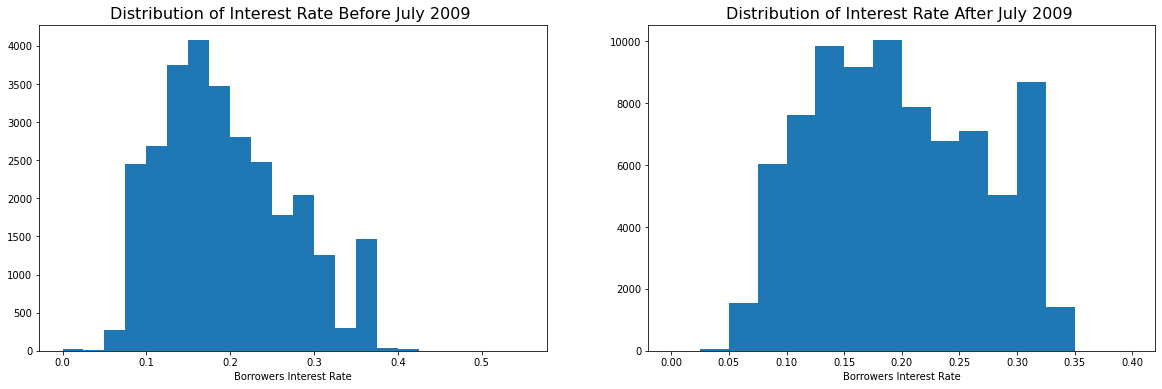

In [12]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
bins = np.arange(0, pre09['BorrowerAPR'].max()+0.05, 0.025)
plt.hist(pre09['BorrowerAPR'], bins =bins)
plt.xlabel('Borrowers Interest Rate')
plt.title('Distribution of Interest Rate Before July 2009 ', fontsize =16);

plt.subplot(1,2,2)
bins = np.arange(0, post09['BorrowerRate'].max()+0.05, 0.025)
plt.hist(post09['BorrowerRate'], bins =bins)
plt.xlabel('Borrowers Interest Rate')
plt.title('Distribution of Interest Rate After July 2009 ', fontsize =16);

## Distribution of Loan Outcome Status 
<font color='navy'>
 <p>
  
 - The Loan Staus indicate the current status of the loan with Status such as Completed, Defualted, Chargedoff and Cancelled being the only Loan Status before the year 2010, whilst from the 2010 Loan Status such as Current, Past Due, and Final Payment Progress were added.
     
        




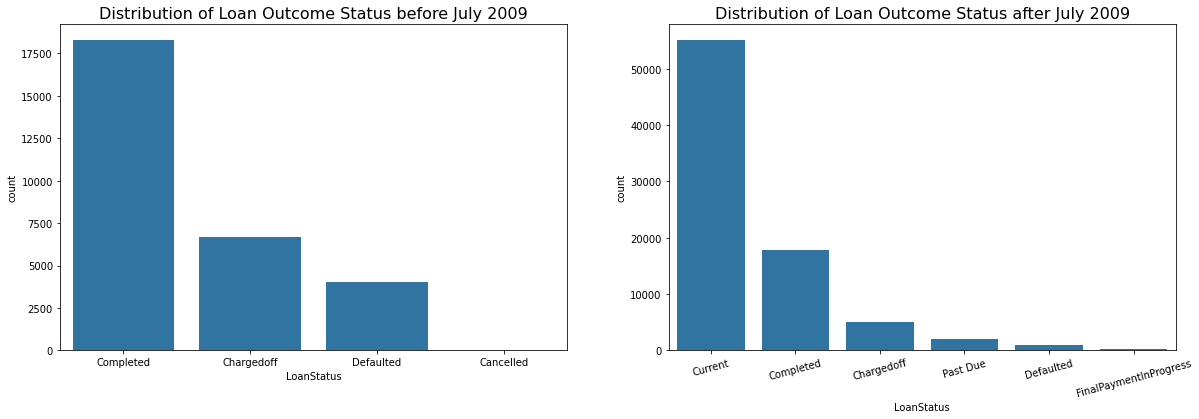

In [17]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
loan_order = pre09['LoanStatus'].value_counts().index
sb.countplot( data = pre09, x = 'LoanStatus', color= base_color, order= loan_order)
plt.title('Distribution of Loan Outcome Status before July 2009', fontsize = 16);

plt.subplot(1,2,2)
loan_order = post09['LoanStatus'].value_counts().index
sb.countplot( data = post09, x = 'LoanStatus', color= base_color, order= loan_order)
plt.xticks(rotation = 15)
plt.title('Distribution of Loan Outcome Status after July 2009', fontsize = 16);

## Borrower Interest Rate vs Loan Status

<font color='navy'>
    
 <p>
  
The relationship between LoanStatus and Borrower Rate was explored using a violin plot.
     
- It is observed that Loans before the year 2010 has tendency of been chargedoff, cancelled or defaulted as the Borrower          Rate increase than been Completed.
     
- This shows a clearer trend as the year goes by from 2010, the highest borrower rate drop from 50% in previous years to           40% although there is exist posibilities of loans with intrest rate greater than 20% to be Defaulted, Chargedoff, or             Past Due (Delinquent).
     
- It is Clearer that loans whose interest rate are below 20% are either Still On and not deliquent yet(Current), In the            final payment stage or completed
 
     
        

    


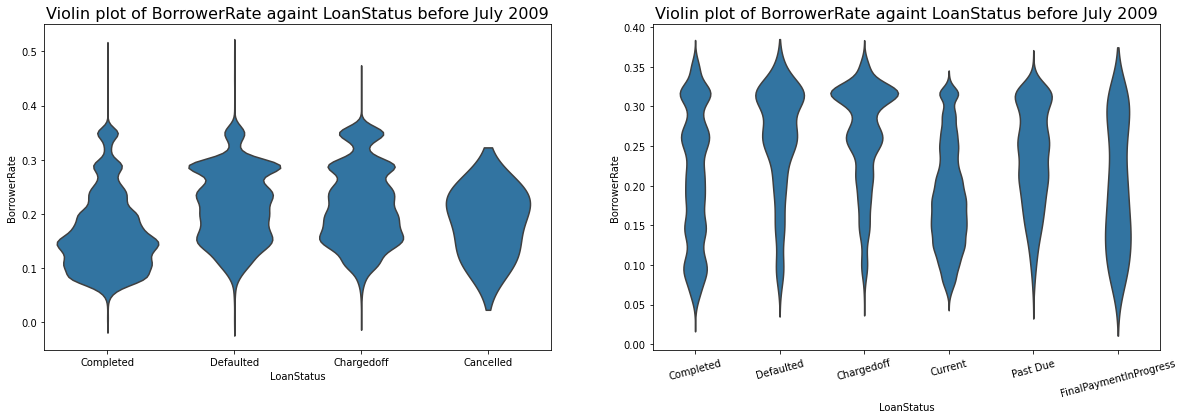

In [20]:
plt.figure(figsize = [20,6])

plt.subplot(1,2,1)
sb.violinplot(data = pre09, x = 'LoanStatus', y = 'BorrowerRate', inner = None, color = base_color)
plt.title('Violin plot of BorrowerRate againt LoanStatus before July 2009', fontsize = 16)

plt.subplot(1,2,2)
sb.violinplot(data = post09, x = 'LoanStatus', y = 'BorrowerRate', inner = None,  color = base_color)
plt.title('Violin plot of BorrowerRate againt LoanStatus before July 2009', fontsize = 16)
plt.xticks(rotation =15)

plt.show();

## Borrower interest rate vs Loan Original Amount of 500 Random data

<font color='navy'>
 <p>
  
- The Multivariate Exploration was carried out on both data. This Explores the Relationship Borrowers Interest Rate with the Loan Amount borrowed by the borrower with a third variable of Loan Status. 

- Since Loan Status is norminal data Shape was used as the encoding parameter 

- With just 500 random data from both dataset, it is observed that there exist a corresponding movemovent between Completed loans and defaulted loans with same loan amount and borrower rate
 
- It is observed that  loans with high loan original amount tends to have interest rate in the 10% -15% range. Suprisingly, loans with higher intrest rate has loan original amount within the range of 5k - 15k

        

 


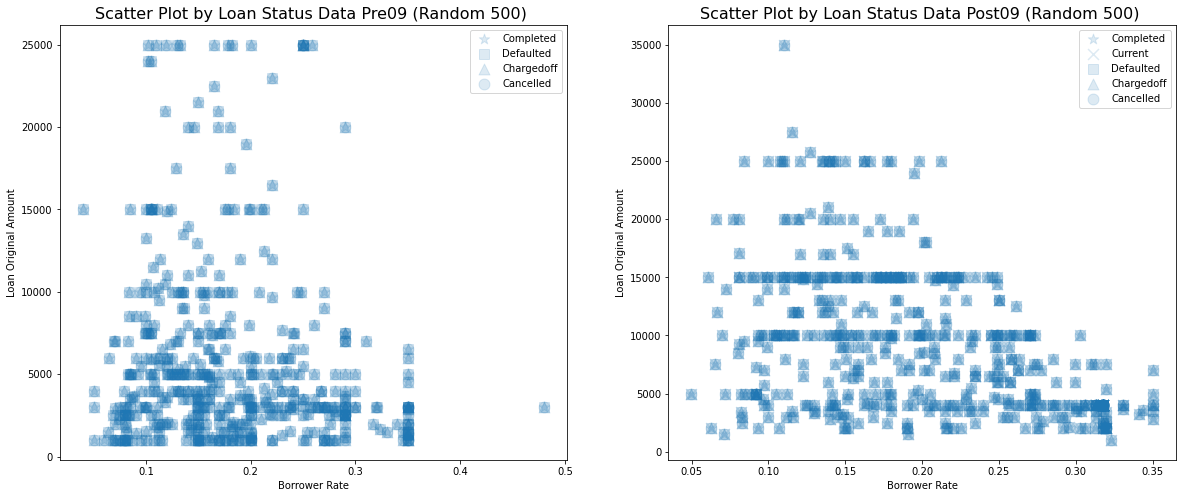

In [26]:

plt.figure(figsize = [20,8])

plt.subplot(1,2,1)
sample = np.random.choice(pre09.shape[0], 500, replace =False)
sub = pre09.iloc[sample]

stat_markers = [['Completed', '*'],
               ['Defaulted', 's'], ['Chargedoff', '^'], ['Cancelled','o']]

for cat, marker in stat_markers:
    
    plt.scatter(data = sub, x = 'BorrowerRate', y = 'LoanOriginalAmount', s=120,color= base_color, marker = marker, alpha=3/20)
plt.ylabel('Loan Original Amount')
plt.xlabel('Borrower Rate')
plt.title('Scatter Plot by Loan Status Data Pre09 (Random 500) ', fontsize =16)
plt.legend(['Completed','Defaulted', 'Chargedoff', 'Cancelled'])


plt.subplot(1,2,2)
sample = np.random.choice(post09.shape[0], 500, replace =False)
sub = post09.iloc[sample]

stat_markers = [['Completed', '*'],['Current', 'x'],
               ['Defaulted', 's'], ['Chargedoff', '^'], ['Cancelled','o']]

for cat, marker in stat_markers:
    
    plt.scatter(data = sub, x = 'BorrowerRate', y = 'LoanOriginalAmount', 
               s = 120, color=base_color, marker = marker, alpha=3/20)
plt.legend(['Completed','Current','Defaulted', 'Chargedoff', 'Cancelled'])
plt.ylabel('Loan Original Amount')
plt.xlabel('Borrower Rate')
plt.title('Scatter Plot by Loan Status Data Post09 (Random 500) ', fontsize =16)
plt.show;

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
